In [24]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
import json

In [25]:
# seeding
np.random.seed(0)

In [27]:
def load_config(config_path=None):
    if config_path is None:
        # Get the current working directory
        cwd = os.getcwd()
        project_root = os.path.abspath(os.path.join(cwd, '..'))  # navigate two levels up to the project root
        config_path = os.path.join(project_root, 'config.json')
    
    with open(config_path, 'r') as config_file:
        config = json.load(config_file)
    return config

def load_data(data_path):
    data = pd.read_csv(data_path)
    return data

config = load_config()
data_path = config['data_path']
df = load_data(data_path)

FileNotFoundError: [Errno 2] No such file or directory

In [12]:
# count amount of unique ids for each lab
unique_ids_count = df.groupby('lab')['mouseID'].nunique()
unique_ids_count


lab
1.0    10
2.0    34
3.0    55
4.0    33
5.0    18
Name: mouseID, dtype: int64

In [13]:
# number of unique combinations of lab and mouseIDs

number_of_unique_combinations = df.groupby(['lab', 'mouseID']).ngroups
number_of_unique_combinations

150

In [14]:
# unique id, L{lab}, M{mouseID}
df['unique_id'] = df['lab'].astype(str) + '_' + df['mouseID'].astype(str)
df['unique_id'] = df['unique_id'].astype('category').cat.codes + 1
df = df.sort_values('unique_id')
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,gamma,rms,mouseID,lab,sleepstage,epoch,unique_id
0,528.584023,370.200447,235.735391,205.805979,75.988092,13.273196,1.274694,0.464923,1.0,1.0,3.0,1.0,1
41184,116.615201,546.520451,190.645089,93.537159,69.205322,10.751717,0.757866,0.577114,1.0,1.0,3.0,43255.0,1
41185,645.094894,227.352963,166.548351,87.381527,49.106154,9.185074,1.245053,0.565131,1.0,1.0,3.0,43256.0,1
41186,424.385826,372.442339,165.275745,118.518396,95.574608,12.109673,0.868221,0.579700,1.0,1.0,3.0,43257.0,1
41187,351.033633,224.878174,353.158072,253.845599,145.775869,11.105222,0.716420,0.573834,1.0,1.0,3.0,43258.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879140,284.110560,222.186698,35.627151,40.795977,29.705343,7.462802,1.872521,0.486890,9.0,5.0,3.0,7178.0,150
1879139,179.342783,176.346349,51.367199,23.391804,11.479414,5.258740,1.472480,2.963182,9.0,5.0,3.0,7177.0,150
1879138,345.407766,267.607792,40.329804,27.410197,29.182522,5.665849,1.104752,0.462965,9.0,5.0,3.0,7176.0,150
1879146,392.315644,1015.969768,322.228194,106.472836,122.871352,18.025534,2.875785,0.469426,9.0,5.0,3.0,7184.0,150


# sleep stages
# 1 = wake 
# 2 = NREM
# 3 = REM

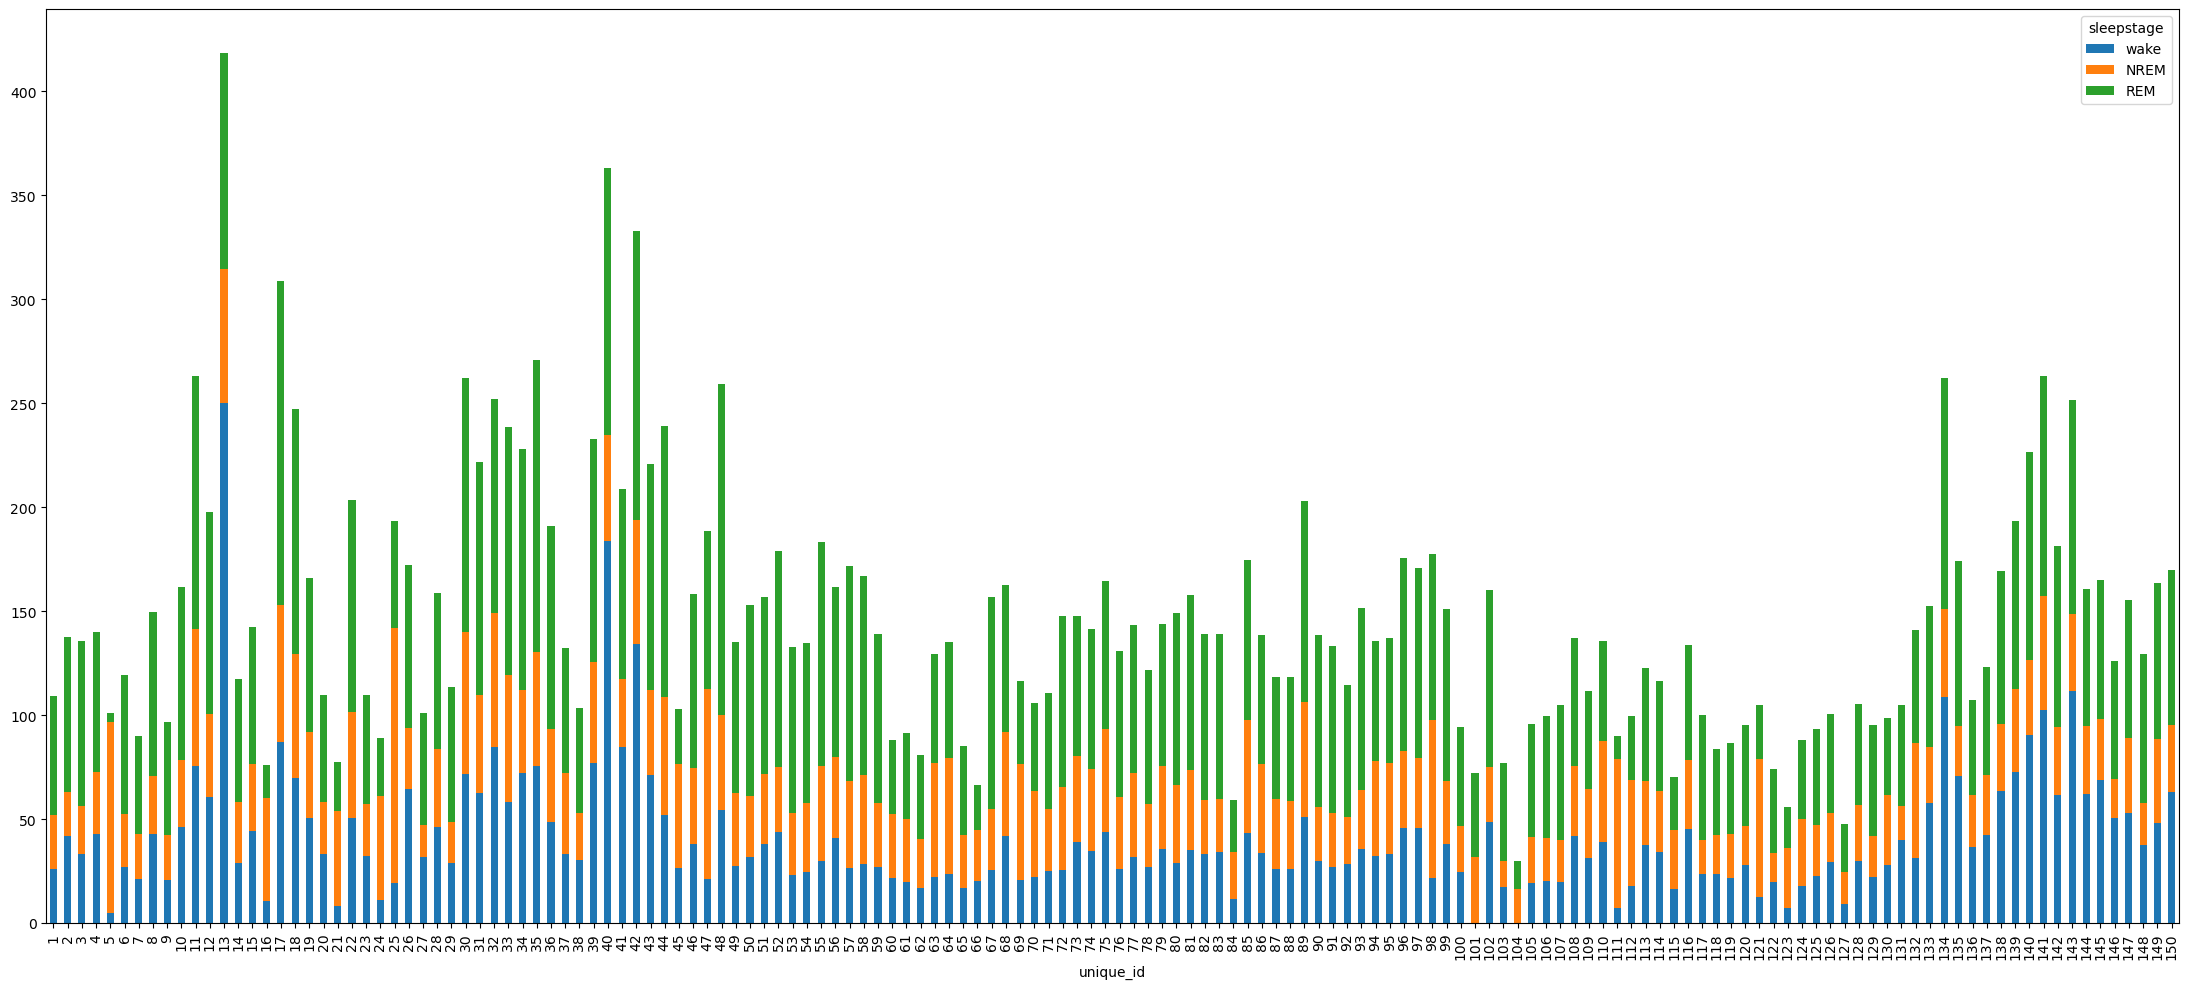

In [19]:
import matplotlib.pyplot as plt

# define a dictionary to map sleep stage numbers to names
sleep_stages = {1: 'wake', 2: 'NREM', 3: 'REM'}

mean_alpha_by_id = df.groupby(['unique_id', 'sleepstage'])['alpha'].mean().unstack().fillna(0)
mean_alpha_by_id.rename(columns=sleep_stages, inplace=True)
mean_alpha_by_id.plot(kind='bar', stacked=True)

# make plot wider
plt.gcf().set_size_inches(22, 10)
plt.tight_layout()
plt.show()